In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
dataset, data_info = tfds.load("malaria", with_info=True, as_supervised= True, shuffle_files= True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteGHA3ZG/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [20]:
def splits(dataset, train_ratio, val_ratio, test_ratio):
  dataset_size = len(dataset)

  train_dataset = dataset.take(int(train_ratio * dataset_size))

  val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
  val_dataset =  dataset.take(int(val_ratio * dataset_size))


  test_dataset = dataset.skip(int(val_ratio * dataset_size))

  return train_dataset, val_dataset, test_dataset


In [21]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1


train_dataset, val_dataset, test_dataset =splits(dataset[0], train_ratio, val_ratio, test_ratio)



In [22]:
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [6]:
for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [7]:
val_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

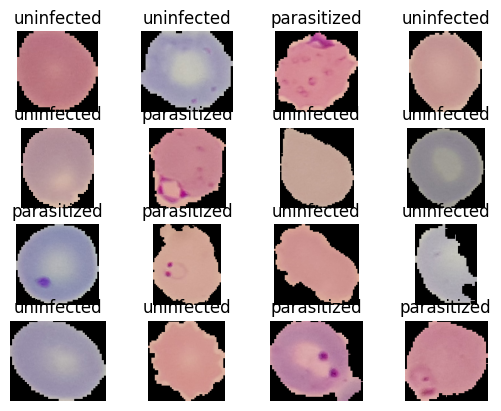

In [8]:
#data Visualization

for i, (image, label) in enumerate(train_dataset.take(16)):
  ax= plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(data_info.features['label'].int2str(label))
  plt.axis('off')

In [23]:
image_size = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (image_size, image_size))/255.0 , label

In [24]:
#data processing

train_dataset = train_dataset.map(resize_rescale)
val_dataset= val_dataset.map(resize_rescale)
test_dataset= test_dataset.map(resize_rescale)

In [11]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [25]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [26]:
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [36]:
#model Creation Lenet Architecture 
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer,BatchNormalization

lenet_model = tf.keras.Sequential([InputLayer(input_shape= (image_size,image_size,3)),
                              Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
                              BatchNormalization(),
                             MaxPool2D(pool_size=2,strides=2),
                             
                             Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',  activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2,strides=2),

                             Flatten(),

                             Dense(100,activation='relu'),
                             BatchNormalization(),
                             Dense(10,activation='relu'),
                             BatchNormalization(),
                             Dense(1,activation='sigmoid'),
                            ])
lenet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [37]:
#Loss Function Binary Cross Entropy

from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

lenet_model.compile(optimizer=Adam(learning_rate=0.01), loss=BinaryCrossentropy(),metrics='Accuracy')


In [38]:
history = lenet_model.fit(train_dataset, validation_data= val_dataset, epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 39s 55ms/step - loss: 0.4702 - Accuracy: 0.7696 - val_loss: 0.7944 - val_Accuracy: 0.7662
Epoch 2/20
689/689 [==============================] - 36s 52ms/step - loss: 0.2120 - Accuracy: 0.9262 - val_loss: 0.1779 - val_Accuracy: 0.9336
Epoch 3/20
689/689 [==============================] - 37s 54ms/step - loss: 0.1804 - Accuracy: 0.9380 - val_loss: 0.1697 - val_Accuracy: 0.9376
Epoch 4/20
689/689 [==============================] - 36s 53ms/step - loss: 0.1724 - Accuracy: 0.9418 - val_loss: 0.2696 - val_Accuracy: 0.9129
Epoch 5/20
689/689 [==============================] - 36s 53ms/step - loss: 0.1544 - Accuracy: 0.9514 - val_loss: 0.1341 - val_Accuracy: 0.9470
Epoch 6/20
689/689 [==============================] - 38s 54ms/step - loss: 0.1438 - Accuracy: 0.9528 - val_loss: 0.1342 - val_Accuracy: 0.9481
Epoch 7/20
689/689 [==============================] - 38s 55ms/step - loss: 0.1412 - Accuracy: 0.9540 - val_loss: 1.5637 - val_Accuracy:

<ipython-input-39-702b57295779>:6: UserWarning: The label '_' of 'i' starts with '_'. It is thus excluded from the legend.
  plt.legend('train_loss','val_loss')
<ipython-input-39-702b57295779>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train_loss','val_loss')


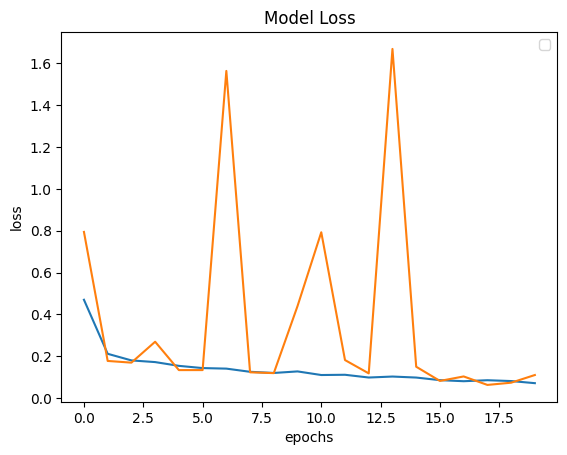

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend('train_loss','val_loss')
plt.show()

In [40]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [41]:
test_dataset = test_dataset.batch(1)

In [42]:
#evaluvating the model

lenet_model.evaluate(test_dataset)

24803/24803 [==============================] - 94s 4ms/step - loss: 0.1470 - Accuracy: 0.9543


[0.14696115255355835, 0.9542797207832336]

In [43]:
#defing a function to label if parasite or uninfected

def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 32ms/step


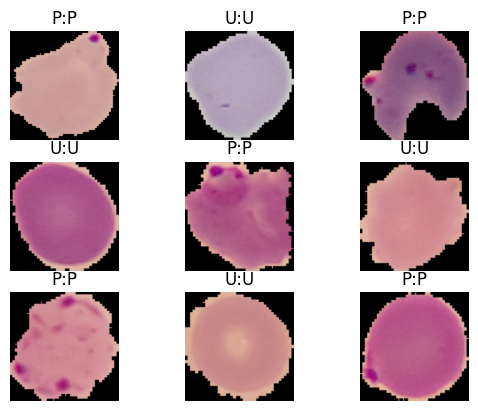

In [45]:
for i , (image, label) in enumerate(test_dataset.take(9)):
  ax= plt.subplot(3,3,i+1)
  plt.imshow(image[0])

  plt.title(str(parasite_or_not(label.numpy()[0]) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0]))))

  plt.axis("off")


In [46]:
lenet_model.save("Lenet_model")

In [48]:
!apt-get install -y git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


# New Section

In [49]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [54]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [55]:
!git init


Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [56]:
!git config --global user.name "singaramvikas"
!git config --global user.email "singaramvikas39@gmail.com"


In [57]:
!git remote add origin <https://github.com/singaramvikas/Malaria_Detection>


/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git remote add origin <https://github.com/singaramvikas/Malaria_Detection>'


In [59]:
!git add .
!git commit -m "Initial commit"


[master a61dcc2] Initial commit
 17 files changed, 1 insertion(+), 16 deletions(-)
 delete mode 100644 Copy of Welcome To Colaboratory
 delete mode 100644 Copy of data_preprocessing_tools.ipynb
 delete mode 100644 SecondHand_car.ipynb
 delete mode 100644 Untitled0.ipynb
 delete mode 100644 Untitled1.ipynb
 delete mode 100644 Untitled10.ipynb
 delete mode 100644 Untitled2.ipynb
 delete mode 100644 Untitled3.ipynb
 delete mode 100644 Untitled4.ipynb
 delete mode 100644 Untitled5.ipynb
 delete mode 100644 Untitled6.ipynb
 delete mode 100644 Untitled7.ipynb
 delete mode 100644 Untitled8.ipynb
 delete mode 100644 Untitled9.ipynb
 delete mode 100644 data_preprocessing_tools.ipynb
 delete mode 100644 the untethered soul (michael a. singer) (Z-Library).pdf


In [60]:
!git push -u origin master


fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [61]:
!git add .
!git commit -m "Initial commit"

[master b55686c] Initial commit
 1 file changed, 1 insertion(+), 1 deletion(-)


In [62]:
!git push -u origin master


fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [63]:
!git clone https://github.com/singaramvikas/Malaria_Detection


Cloning into 'Malaria_Detection'...


In [69]:
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
%cd /content/repository


[Errno 2] No such file or directory: '/content/repository'
/content/drive/MyDrive/Colab Notebooks


In [73]:
!cp /content/drive/MyDrive


cp: missing destination file operand after '/content/drive/MyDrive'
Try 'cp --help' for more information.


In [74]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [75]:
!cp /content/drive/MyDrive/ColabNotebooks/Malaria_Detection.ipynb .


cp: cannot stat '/content/drive/MyDrive/ColabNotebooks/Malaria_Detection.ipynb': No such file or directory
